In [2]:
import numpy as np
import os
import pandas as pd


In [1]:
import gc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
pal = sns.color_palette()

In [4]:
print('# File size')
for i in os.listdir(os.path.join(os.getcwd(), 'Dataset/text3')):
    if 'zip' not in i:
        print(i.ljust(30) + str(round(os.path.getsize('Dataset/text3/' + i) / 1000000, 2)) + 'MB')

# File size
test.csv                      314.02MB
train.csv                     63.4MB


In [3]:
os.getcwd()

'C:\\Users\\HT\\Desktop\\Coderschool\\Mydoing\\Data Science Project'

In [5]:
test = pd.read_csv('Dataset/text3/test.csv')
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
quora = pd.read_csv('Dataset/text3/train.csv')
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [7]:
quora['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [8]:
quora[quora['is_duplicate'] == 1]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


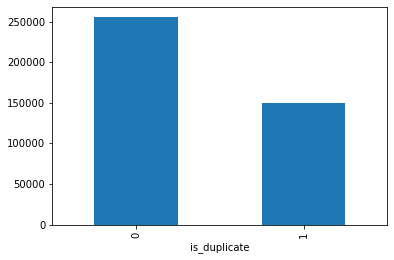

In [52]:
count = quora.groupby('is_duplicate')['id'].count()
count.plot.bar()

In [9]:
print(f" Total number of question pairs for training: {len(quora)}")
print(f" Duplicate pairs: {round(quora['is_duplicate'].mean()*100, 2)}% ")


 Total number of question pairs for training: 404290
 Duplicate pairs: 36.92% 


In [10]:
qids = pd.Series(quora['qid1'].tolist() + quora['qid2'].tolist())
print( f" Total number of questions in the training data: { len(np.unique(qids))}")
print(f" Number of questions that appear multiple times: {np.sum(qids.value_counts() > 1)}")



 Total number of questions in the training data: 537933
 Number of questions that appear multiple times: 111780


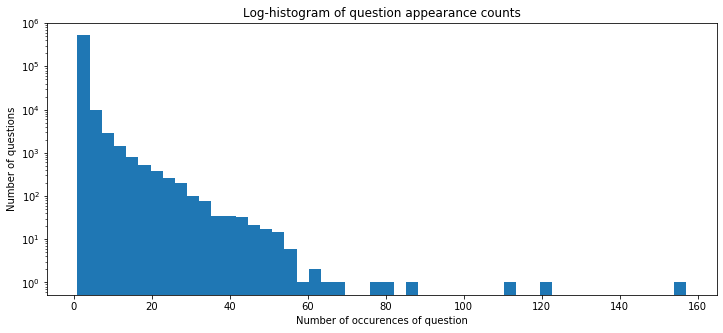

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [17]:
print(f" Total number of question pairs for testing: {len(test)}")

 Total number of question pairs for testing: 2345796


In [13]:
train = quora.copy()
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [14]:
type(train['question1'])

pandas.core.series.Series

In [15]:
a = train['question1'].tolist()
a

['What is the step by step guide to invest in share market in india?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
 'How can I increase the speed of my internet connection while using a VPN?',
 'Why am I mentally very lonely? How can I solve it?',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?',
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
 'Should I buy tiago?',
 'How can I be a good geologist?',
 'When do you use シ instead of し?',
 'Motorola (company): Can I hack my Charter Motorolla DCX3400?',
 'Method to find separation of slits using fresnel biprism?',
 'How do I read and find my YouTube comments?',
 'What can make Physics easy to learn?',
 'What was your first sexual experience like?',
 'What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?',
 'What would a Trump presidency mean for current international 

In [16]:
type(a)

list

In [17]:
train_qs = a + train['question2'].tolist()
train_qs

['What is the step by step guide to invest in share market in india?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
 'How can I increase the speed of my internet connection while using a VPN?',
 'Why am I mentally very lonely? How can I solve it?',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?',
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
 'Should I buy tiago?',
 'How can I be a good geologist?',
 'When do you use シ instead of し?',
 'Motorola (company): Can I hack my Charter Motorolla DCX3400?',
 'Method to find separation of slits using fresnel biprism?',
 'How do I read and find my YouTube comments?',
 'What can make Physics easy to learn?',
 'What was your first sexual experience like?',
 'What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?',
 'What would a Trump presidency mean for current international 

In [18]:
type(train_qs)

list

In [19]:
train_qs = pd.Series(train_qs)
train_qs = train_qs.astype(str)


0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [41]:
test_qs = test['question1'].tolist() + test['question2'].tolist()
test_qs = pd.Series(test_qs).astype(str)

In [42]:
type(test_qs)

pandas.core.series.Series

In [44]:
from  wordcloud import WordCloud


(-0.5, 1439.5, 1079.5, -0.5)

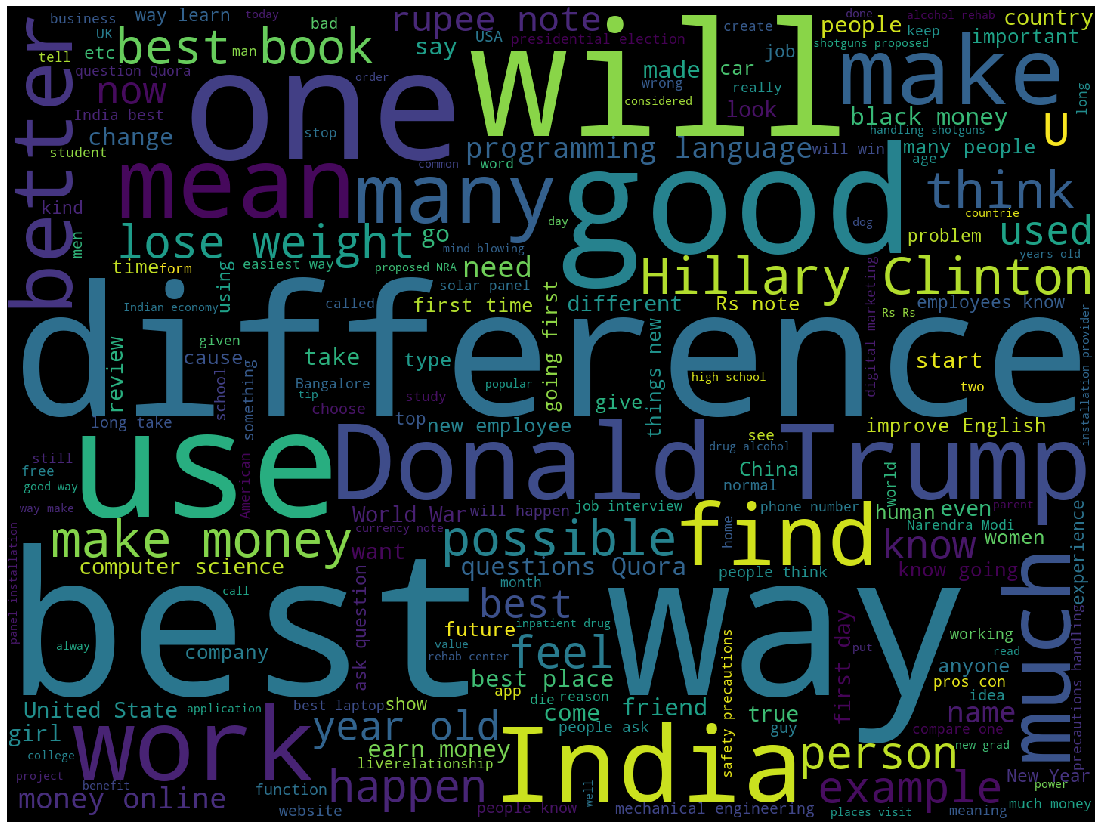

In [45]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')


In [46]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [47]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [48]:
from collections import Counter



In [51]:
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)
    
eps = 5000
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = { word: get_weight(count) for word, count in counts.items()}

print('Most common words and weigths: \n')
print( sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999) [:10])
print('\nLeast common words and weights:')
print(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])


Most common words and weigths: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights:
[('シ', 9.998000399920016e-05), ('し?', 9.998000399920016e-05), ('19-year-old.', 9.998000399920016e-05), ('1-855-425-3768', 9.998000399920016e-05), ('confederates', 9.998000399920016e-05), ('asahi', 9.998000399920016e-05), ('fab', 9.998000399920016e-05), ('109?', 9.998000399920016e-05), ('samrudi', 9.998000399920016e-05), ('fulfill?', 9.998000399920016e-05)]


In [59]:
import nltk
import re

In [55]:
stop = nltk.corpus.stopwords.words()

In [60]:
def clean_sentence(val):
    """
    Remove chars that are not letters or numbers, downcase, then remove stop
    words
    """
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(' ')
    
    for word in list(sentence):
        if word in stop:
            sentence.remove(word)
    sentence = ' '.join(sentence)
    return sentence

def clean_dataframe(data):
    '''
    drop nans, then apply clean_sentence function to question 1, 2
    
    '''
    data = data.dropna(how='any')
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
        
    return data

data = clean_dataframe(quora)

C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0
4,4,9,10,dissolve water quikly sugar salt methane carbo...,fish would survive salt water,0


In [63]:
def build_corpus(data):
    """
    Creates a list of lists containing words from each sentence
    
    """
    
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(' ')
            corpus.append(word_list)
    return corpus

In [64]:
corpus = build_corpus(data)
corpus

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'kohinoor', 'diamond'],
 ['increase', 'speed', 'internet', 'connection', 'using', 'vpn'],
 ['mentally', 'lonely', 'solve'],
 ['dissolve',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'oxide'],
 ['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'risingwhat', 'say'],
 ['buy', 'tiago'],
 ['good', 'geologist'],
 ['use', 'シ', 'instead', 'し'],
 ['motorola', 'company', 'hack', 'charter', 'motorolla', 'dcx3400'],
 ['method', 'find', 'separation', 'slits', 'using', 'fresnel', 'biprism'],
 ['read', 'find', 'youtube', 'comments'],
 ['make', 'physics', 'easy', 'learn'],
 ['first', 'sexual', 'experience', 'like'],
 ['laws',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compare',
  'immigration',
  'laws',
  'canada'],
 ['would',
  'trump',
  'presidency',
  'mean',
  'current',
  'international',
  'masters',
  'students',
  'f1',
  'visa'],
 ['ma

In [66]:
from gensim.models import word2vec

from sklearn.manifold import TSNE


In [67]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)


In [68]:
model.wv['step']

array([ 1.5009041 , -0.6335855 ,  0.02228216, -0.49010637, -1.2337161 ,
        1.0358518 , -0.8761887 , -1.5179582 ,  1.0312667 ,  0.0482609 ,
        0.25440937,  0.09229466, -0.78451407,  1.0424627 ,  0.6294282 ,
        1.0330532 ,  0.7110032 ,  0.09428153,  0.96543694, -1.1612964 ,
       -0.35377115,  0.41244116, -0.02927128,  0.2190069 ,  0.21199554,
        1.6496238 , -0.74868745, -1.8088975 ,  1.265387  ,  1.653996  ,
        2.216911  , -0.27696735,  1.3742797 , -1.7237504 ,  0.24242228,
       -1.425375  ,  2.6447306 ,  0.64807296,  1.0198808 ,  0.82824105,
        1.4801114 ,  0.75168884,  1.2802296 ,  0.13451393, -0.8079205 ,
       -1.2632291 ,  0.27719066, -1.6794275 ,  0.6451902 , -0.7743186 ,
        0.62663394, -0.05444805,  0.3822173 , -1.3072323 , -1.994696  ,
        1.3423598 ,  0.37977982,  1.010661  ,  1.2635429 ,  3.4036129 ,
        2.174611  , -0.03091661,  0.6166867 , -0.10408559,  1.1576601 ,
        1.7387846 ,  1.464177  ,  0.29037997,  0.36645767,  0.48

In [70]:
len(model.wv.vocab)

3292

In [71]:
type(model.wv.vocab)

dict

In [79]:
def tsne_plot(model):
    """
    Creates and TSNE model and plots it
    
    """
    
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500,
                      random_state=23)
    
    new_values = tsne_model.fit_transform(tokens)
    
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
        
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]),
                     xytext=(5, 2), textcoords='offset points',
                     ha='right', va='bottom')
        
    plt.show()
    
        

C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


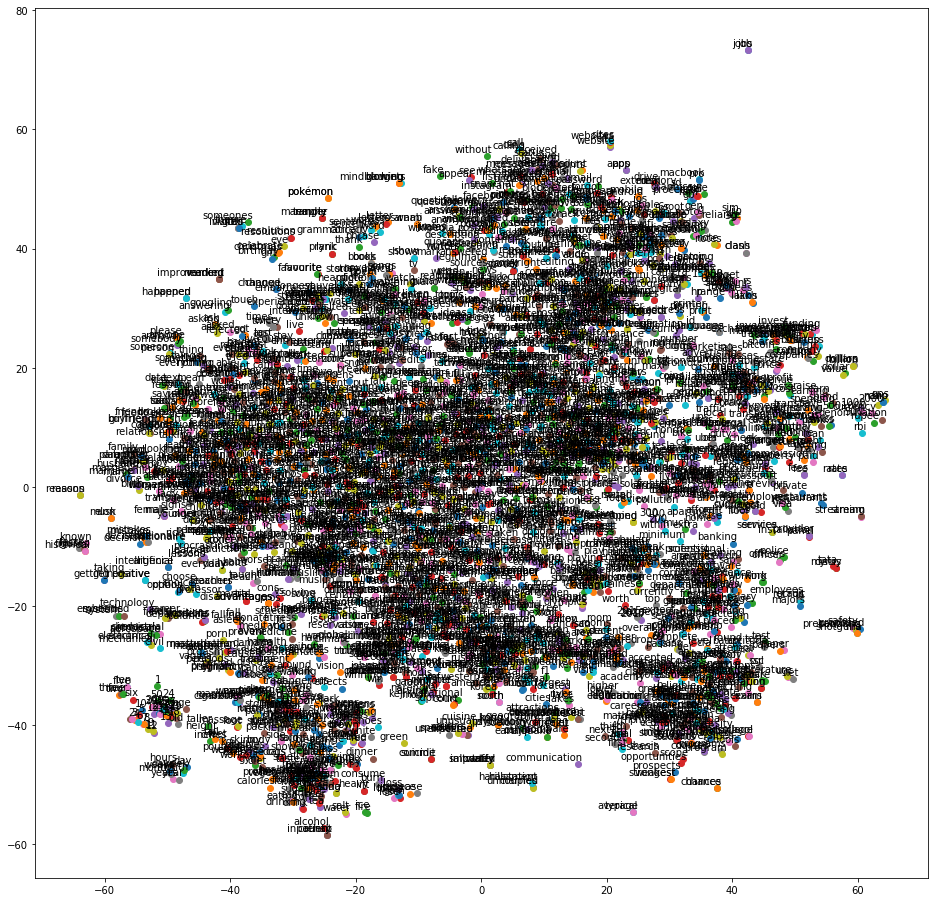

In [80]:
tsne_plot(model)

C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


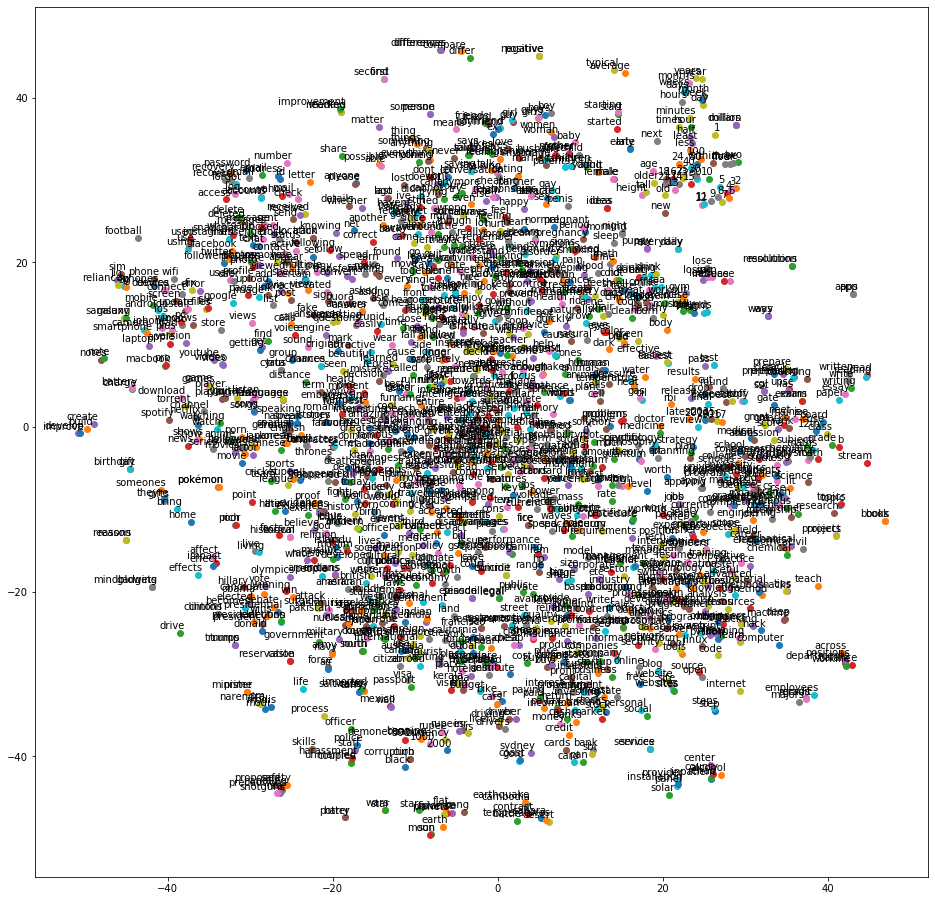

In [81]:
# a more selective model

model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)

tsne_plot(model)

In [ ]:
# # a less selective model

# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)

# tsne_plot(model)

In [82]:
model.most_similar('trump')


C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('trumps', 0.7895630598068237),
 ('wins', 0.5543270707130432),
 ('president', 0.5459082126617432),
 ('elected', 0.5108171105384827),
 ('obama', 0.4992894232273102),
 ('hillary', 0.4959743320941925),
 ('elections', 0.48185229301452637),
 ('election', 0.48112428188323975),
 ('presidential', 0.4577554166316986),
 ('candidate', 0.4409886598587036)]

In [83]:
model.most_similar('step')


C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('steps', 0.5989872813224792),
 ('taken', 0.35872191190719604),
 ('national', 0.3427247107028961),
 ('procedure', 0.3333231210708618),
 ('issue', 0.3125096559524536),
 ('corruption', 0.3055373728275299),
 ('pm', 0.3046090006828308),
 ('modis', 0.2937430441379547),
 ('application', 0.29337745904922485),
 ('another', 0.28459107875823975)]